In [43]:
import numpy as np
import tensorflow as tf
from keras import Sequential
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model


In [ ]:
# #augmentation parameters
# datagen = IDG(
#     rotation_range=2,
#     width_shift_range=0.02,
#     height_shift_range=0.02,
#     shear_range=0.05,
#     zoom_range=0.02,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# #the paths to train, test, and val folders
# train_path = '/content/drive/MyDrive/Genre_Specto/train'
# test_path = '/content/drive/MyDrive/Genre_Specto/test'
# val_path = '/content/drive/MyDrive/Genre_Specto/val'

# # Function to perform augmentation and save images
# def augment_and_save_images(datagen, folder_path):
#     for foldername in os.listdir(folder_path):
#         subfolder = os.path.join(folder_path, foldername)
#         if os.path.isdir(subfolder):
#             for filename in os.listdir(subfolder):
#                 img_path = os.path.join(subfolder, filename)
#                 img = image.load_img(img_path)
#                 x = image.img_to_array(img)
#                 x = x.reshape((1,) + x.shape)

#                 i = 0
#                 for batch in datagen.flow(x, batch_size=1, save_to_dir=subfolder, save_prefix=foldername, save_format='png'):
#                     i += 1
#                     if i >= 4:  # Generating 4 augmented images
#                         break

# # Apply augmentation for each subfolder in train, test, and val
# augment_and_save_images(datagen, train_path)
# augment_and_save_images(datagen, test_path)
# augment_and_save_images(datagen, val_path)


In [2]:
train= IDG(rescale=1/255)
validation= IDG(rescale=1/255)
test=IDG(rescale=1/255)

In [3]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Genre_Specto/train',
                                        target_size=(432,288),
                                        batch_size=10,
                                        class_mode='categorical')

test_dataset=test.flow_from_directory('/content/drive/MyDrive/Genre_Specto/test',
                                        target_size=(432,288),
                                        batch_size=10,
                                        class_mode='categorical')

val_dataset=validation.flow_from_directory('/content/drive/MyDrive/Genre_Specto/val',
                                        target_size=(432,288),
                                        batch_size=10,
                                        class_mode='categorical')

Found 3955 images belonging to 10 classes.
Found 245 images belonging to 10 classes.
Found 749 images belonging to 10 classes.


In [4]:
train_labels = train_dataset.classes
test_labels = test_dataset.classes
val_labels = val_dataset.classes

In [5]:
# Define the class labels
classes = ['blues', 'classical', 'country', 'disco', 'hip-hop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder on training labels and transform them
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Transform validation and test labels using the fitted encoder
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)



In [6]:
# Initialize the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(432,288,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 430, 286, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 215, 143, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 141, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 106, 70, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 68, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 52, 34, 128)       0

In [28]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# Training the model
model_fit=model.fit(train_dataset,
                    steps_per_epoch=20,
                    epochs=300,
                    validation_data=val_dataset)

Epoch 1/300
20/20 [==============================] - 8s 351ms/step - loss: 1.5907 - accuracy: 0.4550 - val_loss: 1.5848 - val_accuracy: 0.4633
Epoch 2/300
20/20 [==============================] - 6s 309ms/step - loss: 1.5506 - accuracy: 0.4800 - val_loss: 1.5702 - val_accuracy: 0.4406
Epoch 3/300
20/20 [==============================] - 6s 325ms/step - loss: 1.5892 - accuracy: 0.4300 - val_loss: 1.5509 - val_accuracy: 0.4766
Epoch 4/300
20/20 [==============================] - 6s 325ms/step - loss: 1.4414 - accuracy: 0.5250 - val_loss: 1.5640 - val_accuracy: 0.4379
Epoch 5/300
20/20 [==============================] - 7s 336ms/step - loss: 1.5636 - accuracy: 0.4550 - val_loss: 1.6101 - val_accuracy: 0.4913
Epoch 6/300
20/20 [==============================] - 7s 344ms/step - loss: 1.4539 - accuracy: 0.4950 - val_loss: 1.5273 - val_accuracy: 0.4766
Epoch 7/300
20/20 [==============================] - 7s 338ms/step - loss: 1.3946 - accuracy: 0.5150 - val_loss: 1.5024 - val_accuracy: 0.4913

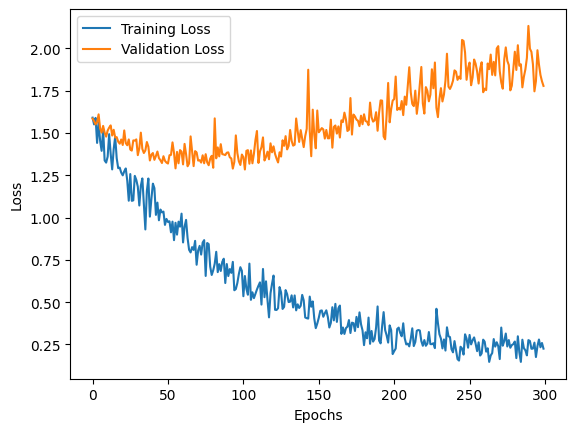

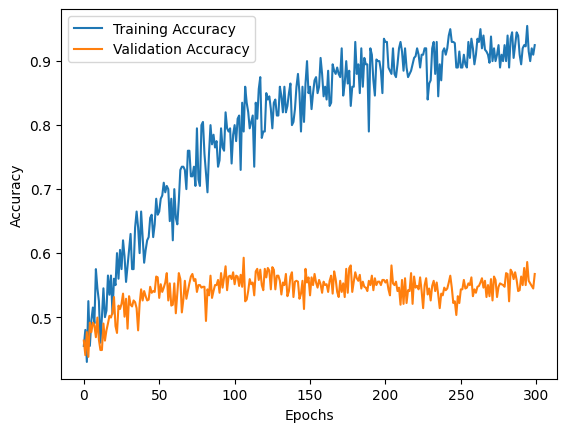

In [30]:
# Plot training and validation loss over epochs
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [31]:
model.save('//content/drive/MyDrive/Genre_Specto/GenreCNN.h5')

inception

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import models, layers

In [33]:
# Load the pre-trained InceptionV3 model without the top classification layers
base_model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(432, 288, 3))

# Add custom classification layers
model2 = models.Sequential()
model2.add(base_model2)
model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))

# Freeze the base model layers
base_model2.trainable = False

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 12, 7, 2048)       21802784  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 22329898 (85.18 MB)
Trainable params: 527114 (2.01 MB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [34]:
# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
# Train the model
model_fit2 = model2.fit(
    train_dataset,
    steps_per_epoch=20,
    epochs=300,
    validation_data=val_dataset,
)
print("Validation Accuracy InceptionNetV3=", model2.evaluate(val_dataset)[1])

Epoch 1/300
20/20 [==============================] - 14s 474ms/step - loss: 2.4305 - accuracy: 0.1050 - val_loss: 2.3018 - val_accuracy: 0.1228
Epoch 2/300
20/20 [==============================] - 7s 348ms/step - loss: 2.3531 - accuracy: 0.1600 - val_loss: 2.1732 - val_accuracy: 0.2737
Epoch 3/300
20/20 [==============================] - 8s 403ms/step - loss: 2.2000 - accuracy: 0.2100 - val_loss: 2.1191 - val_accuracy: 0.2310
Epoch 4/300
20/20 [==============================] - 7s 358ms/step - loss: 2.1583 - accuracy: 0.2000 - val_loss: 2.0804 - val_accuracy: 0.2884
Epoch 5/300
20/20 [==============================] - 7s 346ms/step - loss: 2.0380 - accuracy: 0.2700 - val_loss: 2.0426 - val_accuracy: 0.3124
Epoch 6/300
20/20 [==============================] - 7s 379ms/step - loss: 1.9972 - accuracy: 0.3300 - val_loss: 1.9925 - val_accuracy: 0.3351
Epoch 7/300
20/20 [==============================] - 8s 399ms/step - loss: 1.9589 - accuracy: 0.2900 - val_loss: 1.9504 - val_accuracy: 0.380

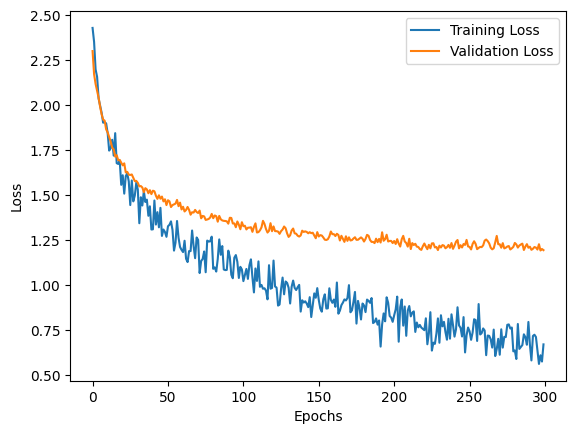

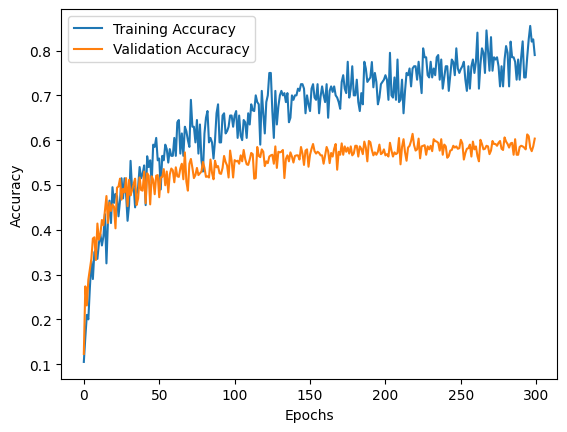

In [36]:
# Plot training and validation loss over epochs
plt.plot(model_fit2.history['loss'], label='Training Loss')
plt.plot(model_fit2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(model_fit2.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [37]:
model2.save('//content/drive/MyDrive/Genre_Specto/GenreInception.h5')

In [38]:
from tensorflow.keras.applications import MobileNet

In [39]:

# Load the pre-trained MobileNet model without the top classification layers
base_model3 = MobileNet(weights='imagenet', include_top=False, input_shape=(432, 288, 3))

# Add custom classification layers
model3 = models.Sequential()
model3.add(base_model3)
model3.add(layers.GlobalAveragePooling2D())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation='softmax'))

# Freeze the base model layers
base_model3.trainable = False

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 12, 7, 2048)       21802784  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 22329898 (85.18 MB)
Trainable params: 527114 (2.01 MB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [40]:
# Compile the model
model3.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Train the model
model_fit3 = model3.fit(
    train_dataset,
    steps_per_epoch=20,
    epochs=200,
    validation_data=val_dataset,
)
print("Validation Accuracy InceptionNetV3=", model3.evaluate(val_dataset)[1])

Epoch 1/200
20/20 [==============================] - 10s 422ms/step - loss: 2.6034 - accuracy: 0.1150 - val_loss: 2.3042 - val_accuracy: 0.1055
Epoch 2/200
20/20 [==============================] - 6s 334ms/step - loss: 2.5047 - accuracy: 0.0900 - val_loss: 2.1825 - val_accuracy: 0.2617
Epoch 3/200
20/20 [==============================] - 7s 350ms/step - loss: 2.2800 - accuracy: 0.2000 - val_loss: 2.0823 - val_accuracy: 0.3284
Epoch 4/200
20/20 [==============================] - 7s 378ms/step - loss: 2.1699 - accuracy: 0.2400 - val_loss: 2.0024 - val_accuracy: 0.3498
Epoch 5/200
20/20 [==============================] - 6s 325ms/step - loss: 2.0290 - accuracy: 0.2750 - val_loss: 1.9293 - val_accuracy: 0.3885
Epoch 6/200
20/20 [==============================] - 6s 330ms/step - loss: 2.0005 - accuracy: 0.3400 - val_loss: 1.8717 - val_accuracy: 0.4179
Epoch 7/200
20/20 [==============================] - 12s 610ms/step - loss: 2.0240 - accuracy: 0.2850 - val_loss: 1.8245 - val_accuracy: 0.44

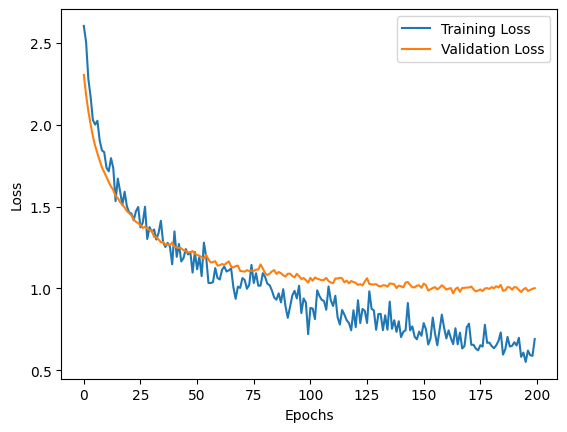

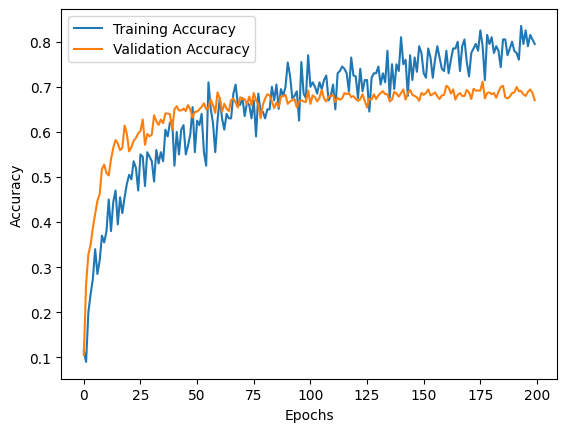

In [41]:
# Plot training and validation loss over epochs
plt.plot(model_fit3.history['loss'], label='Training Loss')
plt.plot(model_fit3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(model_fit3.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [42]:
model3.save('//content/drive/MyDrive/Genre_Specto/GenreMobNet.h5')

In [44]:
CNN=load_model('/content/drive/MyDrive/Genre_Specto/GenreCNN.h5')
Incep=load_model('/content/drive/MyDrive/Genre_Specto/GenreInception.h5')
Mob=load_model('/content/drive/MyDrive/Genre_Specto/GenreMobNet.h5')

In [48]:
# from keras.preprocessing import image
# import numpy as np

# Path to your single input image
input_image_path = '/content/drive/MyDrive/Genre_Specto/test/blues/blues00056.png'  # Change this to the path of your image

# Load and preprocess the image
img = image.load_img(input_image_path, target_size=(432, 288))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension




In [49]:
# Make a prediction using the loaded model
prediction_CNN = CNN.predict(img_array)
prediction_Incep=Incep.predict(img_array)
prediction_Mob=Mob.predict(img_array)


1/1 [==============================] - 1s 628ms/step


In [50]:
# Display the probabilities for each class
print("Predicted probabilities for the input image with CNN:")
for class_index, probability in enumerate(prediction_CNN[0]):
    print(f"{classes[class_index]}: {probability * 100:.2f}%")

Predicted probabilities for the input image with CNN:
blues: 41.25%
classical: 0.03%
country: 3.24%
disco: 0.10%
hip-hop: 0.06%
jazz: 27.38%
metal: 1.21%
pop: 0.06%
reggae: 26.60%
rock: 0.06%


In [51]:

print("Predicted probabilities for the input image with InceptionNet:")
for class_index, probability in enumerate(prediction_Incep[0]):
    print(f"{classes[class_index]}: {probability * 100:.2f}%")

Predicted probabilities for the input image with InceptionNet:
blues: 28.82%
classical: 0.20%
country: 58.08%
disco: 0.80%
hip-hop: 0.10%
jazz: 1.01%
metal: 0.08%
pop: 1.10%
reggae: 2.51%
rock: 7.30%


In [53]:

print("Predicted probabilities for the input image with MobileNet:")
for class_index, probability in enumerate(prediction_Mob[0]):
    print(f"{classes[class_index]}: {probability * 100:.2f}%")

Predicted probabilities for the input image with MobileNet:
blues: 14.14%
classical: 0.04%
country: 53.03%
disco: 5.50%
hip-hop: 0.55%
jazz: 0.81%
metal: 1.23%
pop: 4.37%
reggae: 7.75%
rock: 12.58%
